In [1]:
import os
from google.cloud import bigquery
import pandas as pd 

In [2]:
#set environment
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= '/Users/jordanmaulino/Downloads/coastal-dynamo-309722-2032fe38e9cd.json'

In [3]:
client = bigquery.Client()

In [4]:
dataset_ref = client.dataset("covid19_ecdc", project="bigquery-public-data")

dataset=client.get_dataset(dataset_ref)

In [5]:
tables = list(client.list_tables(dataset))

In [6]:
for table in tables:
    print(table.table_id)

covid_19_geographic_distribution_worldwide


In [7]:
table_ref = dataset_ref.table("covid_19_geographic_distribution_worldwide")

table=client.get_table(table_ref)

In [8]:
table.schema

[SchemaField('date', 'DATE', 'NULLABLE', None, (), None),
 SchemaField('day', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('month', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('year', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('daily_confirmed_cases', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('daily_deaths', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('confirmed_cases', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('deaths', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('countries_and_territories', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('geo_id', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('country_territory_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('pop_data_2019', 'INTEGER', 'NULLABLE', None, (), None)]

In [9]:
client.list_rows(table, max_results=5).to_dataframe()

,date,day,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2019
0,2020-03-20,20,3,2020,1,0,1,0,Chad,TD,TCD,15946882
1,2020-03-21,21,3,2020,0,0,1,0,Chad,TD,TCD,15946882
2,2020-03-22,22,3,2020,1,0,2,0,Chad,TD,TCD,15946882
3,2020-03-23,23,3,2020,0,0,2,0,Chad,TD,TCD,15946882
4,2020-03-24,24,3,2020,0,0,2,0,Chad,TD,TCD,15946882


In [10]:
#query to select covid cases by country on 12/1/2020
query = """
        SELECT daily_confirmed_cases, confirmed_cases, daily_deaths, countries_and_territories
        FROM `bigquery-public-data.covid19_ecdc.covid_19_geographic_distribution_worldwide`
        WHERE date = '2020-12-01'
        ORDER BY daily_confirmed_cases DESC
        """


query_job = client.query(query)

covid_cases_12_1_2020 = query_job.to_dataframe()

covid_cases_12_1_2020.head()

,daily_confirmed_cases,confirmed_cases,daily_deaths,countries_and_territories
0,157903,13541224,1172,United_States_of_America
1,31219,617310,188,Turkey
2,31118,9462809,482,India
3,26338,2295654,368,Russia
4,21138,6335878,287,Brazil


In [13]:
covid_cases_12_1_2020.shape

(213, 4)

In [15]:
covid_cases_12_1_2020.nunique()

daily_confirmed_cases        142
confirmed_cases              211
daily_deaths                  64
countries_and_territories    213
dtype: int64

In [19]:
covid_cases_12_1_2020.countries_and_territories

0              United_States_of_America
1                                Turkey
2                                 India
3                                Russia
4                                Brazil
                     ...               
208            Northern_Mariana_Islands
209            Turks_and_Caicos_islands
210         Falkland_Islands_(Malvinas)
211         United_Republic_of_Tanzania
212    Saint_Vincent_and_the_Grenadines
Name: countries_and_territories, Length: 213, dtype: object

In [20]:
covid_cases_12_1_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   daily_confirmed_cases      213 non-null    int64 
 1   confirmed_cases            213 non-null    int64 
 2   daily_deaths               213 non-null    int64 
 3   countries_and_territories  213 non-null    object
dtypes: int64(3), object(1)
memory usage: 6.8+ KB


In [21]:
covid_cases_12_1_2020.describe()

,daily_confirmed_cases,confirmed_cases,daily_deaths
count,213.000000,2.130000e+02,213.000000
mean,2356.511737,2.974743e+05,41.328638
std,11578.408615,1.242240e+06,121.067870
min,0.000000,1.000000e+00,0.000000
25%,3.000000,1.688000e+03,0.000000
50%,88.000000,1.608900e+04,1.000000
75%,1077.000000,1.359670e+05,19.000000
max,157903.000000,1.354122e+07,1172.000000


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

Our dataframe is already sorted in descending order thanks to our query, so we can easily access the top 10 most infected countries from 12/1/2020.

In [26]:
cases_top10 = covid_cases_12_1_2020.loc[0:9]

In [27]:
cases_top10

,daily_confirmed_cases,confirmed_cases,daily_deaths,countries_and_territories
0,157903,13541224,1172,United_States_of_America
1,31219,617310,188,Turkey
2,31118,9462809,482,India
3,26338,2295654,368,Russia
4,21138,6335878,287,Brazil
5,16376,1601554,672,Italy
6,13604,1067473,388,Germany
7,13321,962070,371,Iran
8,12330,1629657,203,United_Kingdom
9,9946,732625,114,Ukraine


Text(0.5, 1.0, 'Countries/Territories with the Most Daily Confirmed Cases as of 12/1/2020')

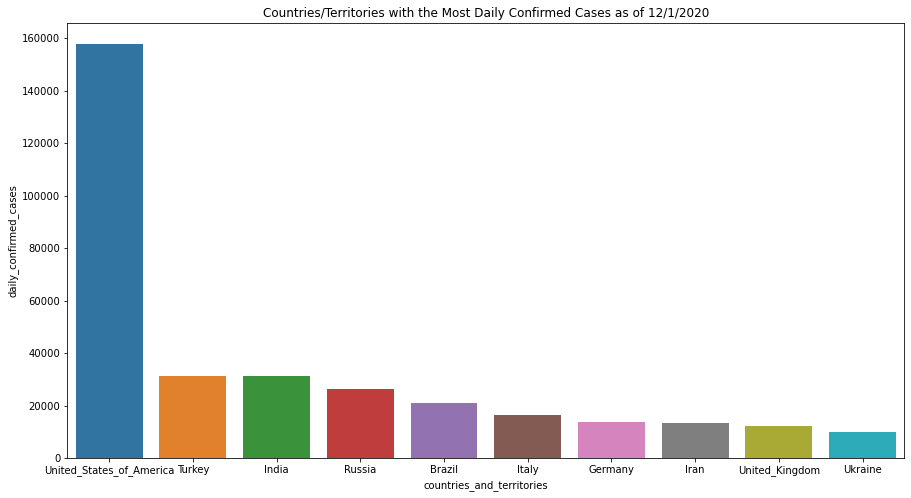

In [29]:
plt.figure(figsize=(15, 8))
sns.barplot(x="countries_and_territories", y="daily_confirmed_cases", data=cases_top10)
plt.title("Countries/Territories with the Most Daily Confirmed Cases as of 12/1/2020")